<a href="https://colab.research.google.com/github/riponalmamun/Arsenic-Skin-Image/blob/main/WITH_ROC_CURVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import  t, ttest_ind, ttest_rel
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

🧾 Classes found: ['infacted', 'not_infacted']

📊 Image count per class:
  infacted: 741 images
  not_infacted: 546 images


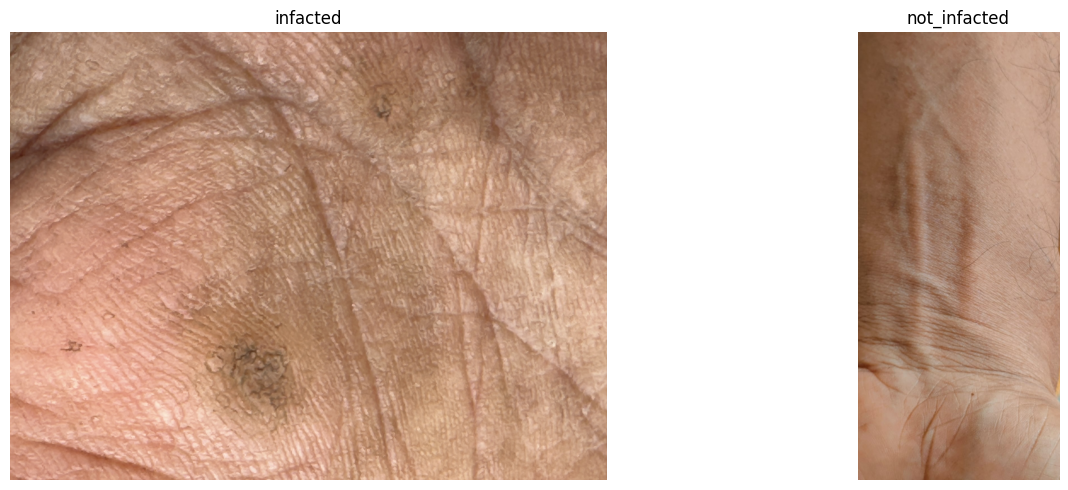

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set dataset directory
data_dir ='/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original'

# List class folders
classes = sorted(os.listdir(data_dir))
print("🧾 Classes found:", classes)

# Count images per class
class_counts = {}
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count

print("\n📊 Image count per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

# Show a sample image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        img = mpimg.imread(os.path.join(cls_path, img_files[0]))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

plt.tight_layout()
plt.show()

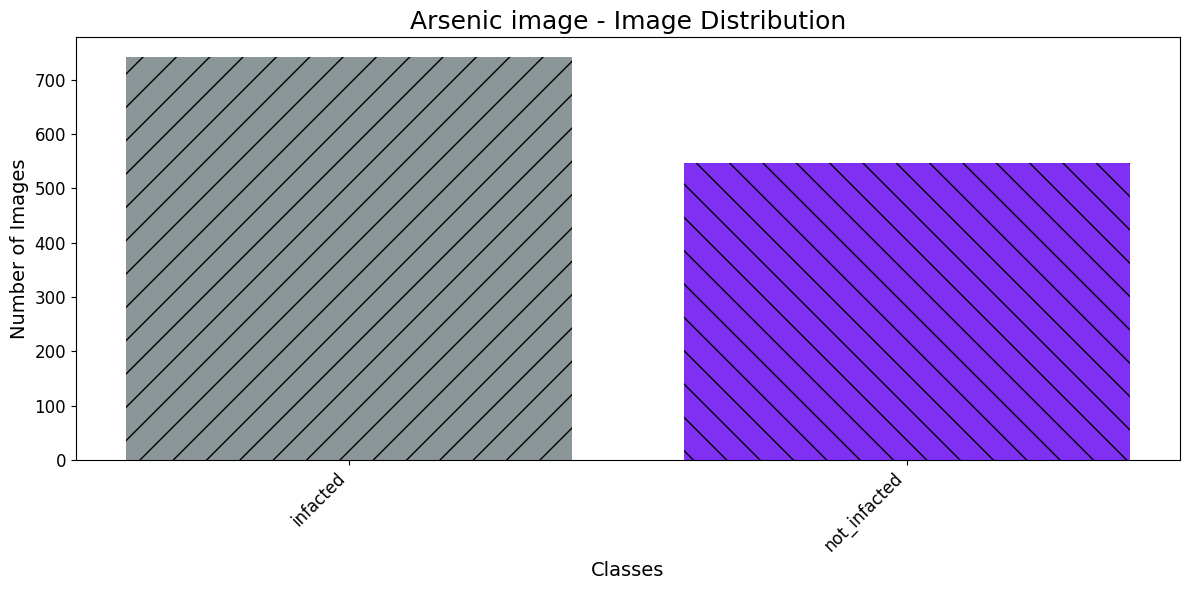


📊 Total images: 1287
📂 Image count per class:

       Class  Number of Images
    infacted               741
not_infacted               546


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# Define dataset path
dataset_path ='/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original'
   # ✅ Adjust if needed

# Count images per class
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
class_counts = defaultdict(int)
total_images = 0

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ]
        count = len(image_files)
        class_counts[class_folder] = count
        total_images += count

# Prepare data for plotting
categories = sorted(class_counts.keys())
image_counts = [class_counts[cls] for cls in categories]

# Plotting
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"] * (len(categories) // 8 + 1)
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]
bars = plt.bar(categories, image_counts, color=colors)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("Arsenic image - Image Distribution", fontsize=18)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
save_path = os.path.join(dataset_path, "Arsenic_Image_Distribution.png")
plt.savefig(save_path, format="png", dpi=600)
plt.show()

# Table output
df = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(f"\n📊 Total images: {total_images}")
print("📂 Image count per class:\n")
print(df.to_string(index=False))

In [ ]:
import shutil
import os
import random

# Define dataset source path
dataset_source = '/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original'

# Define target paths for train, validation, and test sets
train_path = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/train"
val_path = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/val"
test_path ="/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/test"

# Create directories for train, validation, and test sets if they don't exist
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Define the split ratios for train, validation, and test
split_ratios = {"train": 0.8, "val": 0.05, "test": 0.15}

# Iterate through each class folder (assuming class-wise folder structure in the dataset)
for class_folder in os.listdir(dataset_source):
    class_path = os.path.join(dataset_source, class_folder)

    # Process only directories (class folders)
    if os.path.isdir(class_path):
        # List only image files within the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Shuffle the image filenames to randomize the split
        random.shuffle(images)

        # Calculate the number of images for each split
        train_split = int(len(images) * split_ratios["train"])
        val_split = int(len(images) * split_ratios["val"])
        test_split = len(images) - train_split - val_split

        # Split and copy images into respective directories
        for i, img in enumerate(images):
            src_img_path = os.path.join(class_path, img)

            # Determine the target folder based on the split
            if i < train_split:
                dest_folder = os.path.join(train_path, class_folder)
            elif i < train_split + val_split:
                dest_folder = os.path.join(val_path, class_folder)
            else:
                dest_folder = os.path.join(test_path, class_folder)

            # Ensure the target folder exists
            os.makedirs(dest_folder, exist_ok=True)

            # Define the full path for the destination image (with the image name included)
            dest_img_path = os.path.join(dest_folder, img)

            # Copy the image to the appropriate folder
            shutil.copy(src_img_path, dest_img_path)

print("✅ Dataset successfully split into train/val/test (80%/5%/15%)!")

✅ Dataset successfully split into train/val/test (80%/5%/15%)!


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=26336742d628ee4d1a6f1c650368d305df299230a5968a04b

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 151MB/s] 


Loaded pretrained weights for efficientnet-b0
Epoch 1/25
----------
Train Loss: 0.5940 Train Acc: 0.6809
Val   Loss: 0.6008 Val   Acc: 0.7500
Epoch 2/25
----------
Train Loss: 0.4220 Train Acc: 0.8444
Val   Loss: 0.4674 Val   Acc: 0.9062
Epoch 3/25
----------
Train Loss: 0.3302 Train Acc: 0.8930
Val   Loss: 0.3407 Val   Acc: 0.9375
Epoch 4/25
----------
Train Loss: 0.2743 Train Acc: 0.9125
Val   Loss: 0.2633 Val   Acc: 0.9219
Epoch 5/25
----------
Train Loss: 0.2246 Train Acc: 0.9280
Val   Loss: 0.2215 Val   Acc: 0.9375
Epoch 6/25
----------
Train Loss: 0.2024 Train Acc: 0.9358
Val   Loss: 0.1908 Val   Acc: 0.9531
Epoch 7/25
----------
Train Loss: 0.1736 Train Acc: 0.9523
Val   Loss: 0.1707 Val   Acc: 0.9531
Epoch 8/25
----------
Train Loss: 0.1478 Train Acc: 0.9708
Val   Loss: 0.1567 Val   Acc: 0.9531
Epoch 9/25
----------
Train Loss: 0.1231 Train Acc: 0.9708
Val   Loss: 0.1457 Val   Acc: 0.9531
Epoch 10/25
----------
Train Loss: 0.1105 Train Acc: 0.9747
Val   Loss: 0.1389 Val   Acc: 

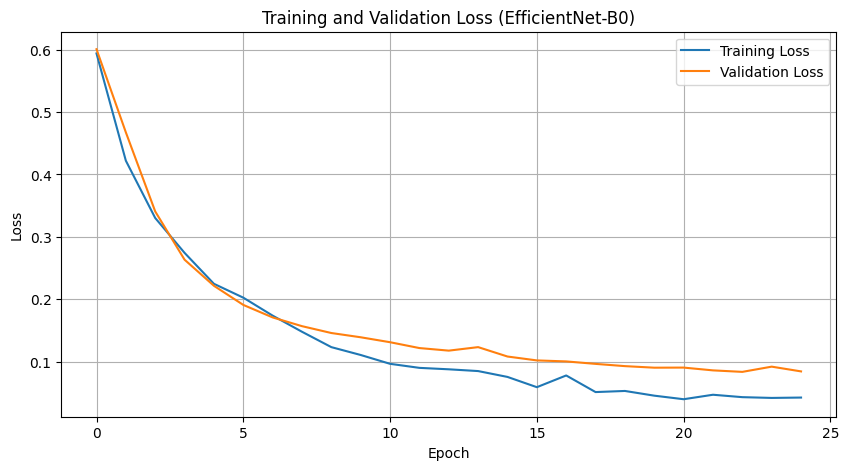

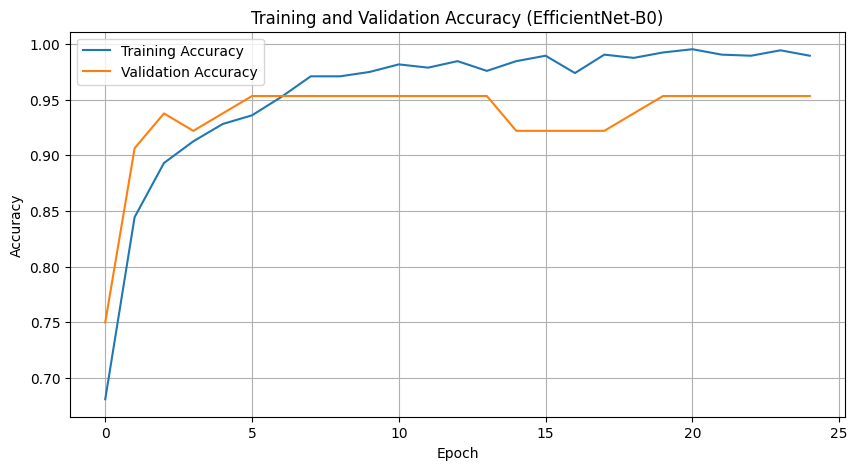


✅ Test Accuracy: 0.9846


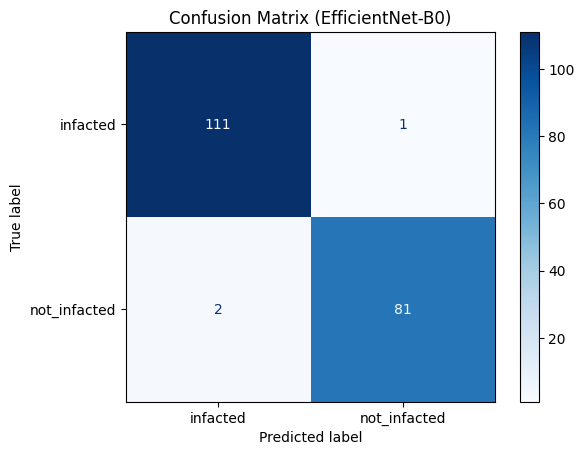

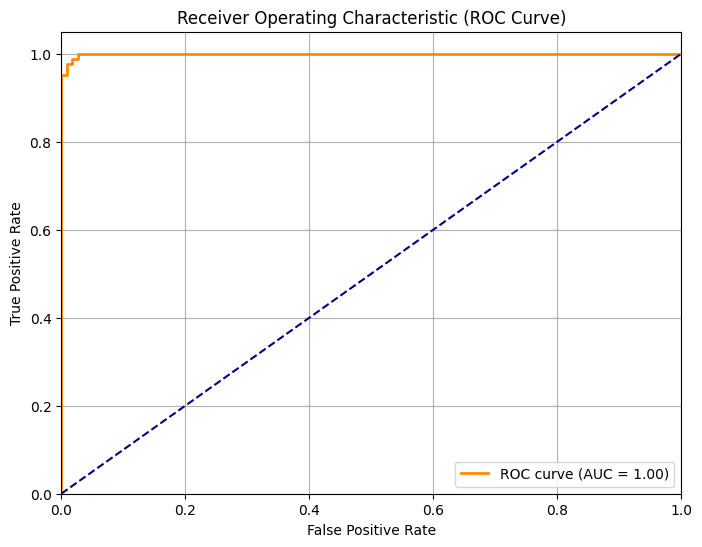

In [ ]:
# Install necessary packages
!pip install torch torchvision matplotlib scikit-learn efficientnet_pytorch

import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from efficientnet_pytorch import EfficientNet
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import os

# Set up paths
train_data_dir = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/train"
valid_data_dir = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/val"
test_data_dir  = "/content/drive/MyDrive/capstone/ArsenicSkinImageBD/Original/test"

# Check directories
for directory in [train_data_dir, valid_data_dir, test_data_dir]:
    os.makedirs(directory, exist_ok=True)

# Image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # EfficientNet default input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
valid_dataset = datasets.ImageFolder(root=valid_data_dir, transform=transform)
test_dataset  = datasets.ImageFolder(root=test_data_dir,  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)

# Load pre-trained EfficientNet-B0
model = EfficientNet.from_pretrained('efficientnet-b0')
num_features = model._fc.in_features
model._fc = nn.Linear(num_features, len(train_dataset.classes))  # Replace final FC layer

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train model function
def train_model(model, criterion, optimizer, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.double() / len(train_dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        valid_loss = 0.0
        valid_corrects = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                valid_corrects += torch.sum(preds == labels.data)

        val_loss = valid_loss / len(valid_dataset)
        val_acc = valid_corrects.double() / len(valid_dataset)
        valid_losses.append(val_loss)
        valid_accuracies.append(val_acc.item())

        print(f'Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f}')
        print(f'Val   Loss: {val_loss:.4f} Val   Acc: {val_acc:.4f}')

        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()

    print(f'\n✅ Best Validation Accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, train_losses, valid_losses, train_accuracies, valid_accuracies

# Train the model
model, train_losses, valid_losses, train_accuracies, valid_accuracies = train_model(model, criterion, optimizer, num_epochs=25)

# Save the model
torch.save(model.state_dict(), 'efficientnet_b0_model.pth')
print("✅ Model saved successfully!")

# Plot Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss (EfficientNet-B0)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Graph
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy (EfficientNet-B0)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Evaluate model + Confusion Matrix + ROC Curve
def evaluate_model(model):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            probs = torch.softmax(outputs, dim=1)  # Get class probabilities
            _, preds = torch.max(outputs, 1)

            all_probs.extend(probs[:, 1].cpu().numpy())  # Probability of class 1
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Test Accuracy
    accuracy = (all_preds == all_labels).sum() / len(all_labels)
    print(f'\n✅ Test Accuracy: {accuracy:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (EfficientNet-B0)")
    plt.show()

    # ROC Curve
    if len(np.unique(all_labels)) == 2:  # Only for binary classification
        fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC Curve)')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
    else:
        print("ROC Curve is only plotted for binary classification.")

# Run final evaluation
evaluate_model(model)

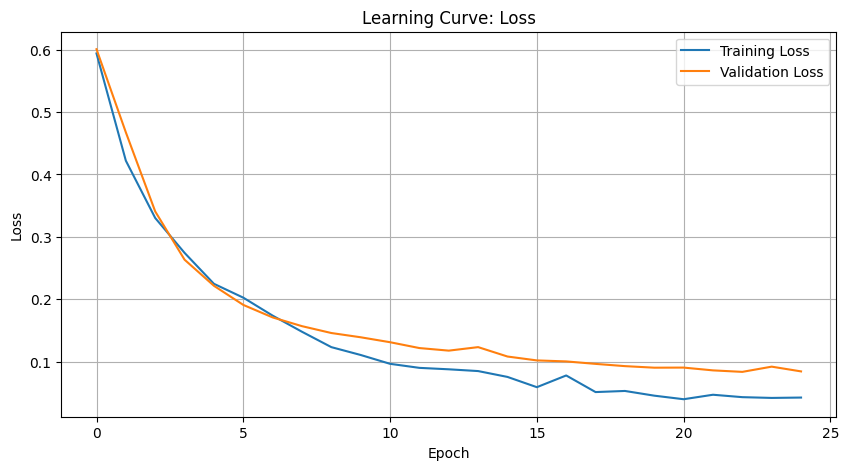

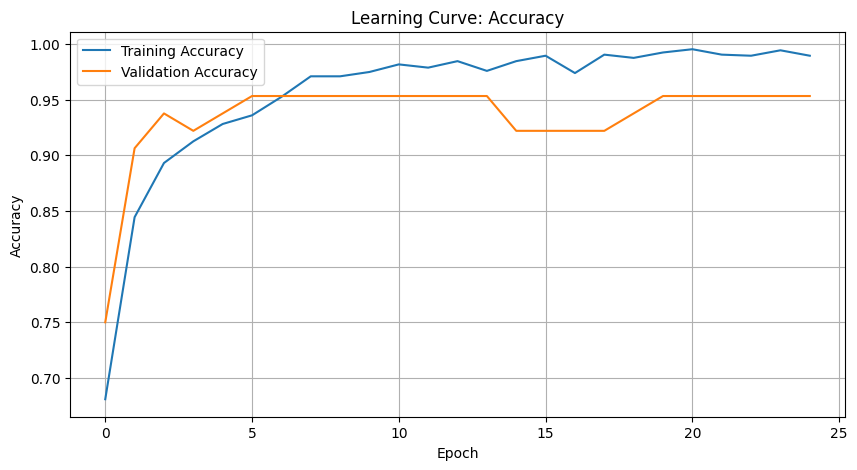

In [ ]:
# Plot Learning Curves (Loss and Accuracy)
def plot_learning_curves(train_losses, valid_losses, train_accuracies, valid_accuracies):
    # Loss Curve
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title('Learning Curve: Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Accuracy Curve
    plt.figure(figsize=(10,5))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(valid_accuracies, label='Validation Accuracy')
    plt.title('Learning Curve: Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Call after training
plot_learning_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)

✅ AUC Score: 0.9992


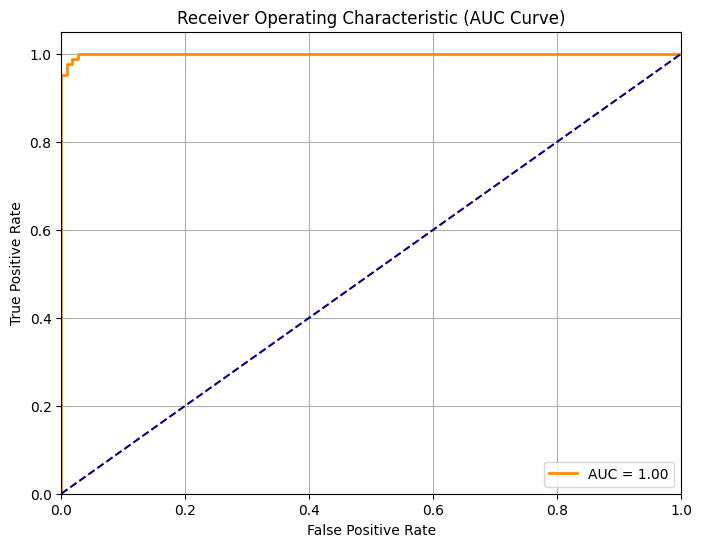

In [ ]:
# AUC Curve Only
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_auc_curve(model, test_loader):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            probs = torch.softmax(outputs, dim=1)  # Probabilities
            all_probs.extend(probs[:, 1].cpu().numpy())  # Probability of class 1
            all_labels.extend(labels.cpu().numpy())

    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    if len(np.unique(all_labels)) == 2:  # Binary classification
        fpr, tpr, _ = roc_curve(all_labels, all_probs)
        roc_auc = auc(fpr, tpr)
        print(f'✅ AUC Score: {roc_auc:.4f}')

        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (AUC Curve)')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
    else:
        print("⚠️ AUC Curve can only be plotted for binary classification.")

# 🔥 Call this after training:
plot_auc_curve(model, test_loader)
